### Q-7. Imagine you have a dataset where you need to predict the Genres of Music using an Unsupervised algorithm and you need to find the accuracy of the model, built-in docker, and use some library to display that in frontend

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [52]:
df = pd.read_csv('data.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [53]:
df1 = pd.read_csv('data_2genre.csv')
df1.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [54]:
data = pd.concat([df,df1])
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [55]:
data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
1            100
2            100
Name: label, dtype: int64

In [56]:
data['label'] = data['label'].replace(to_replace={1: 'pop', 2: 'classical'})

In [57]:
data['label'].value_counts()

classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: label, dtype: int64

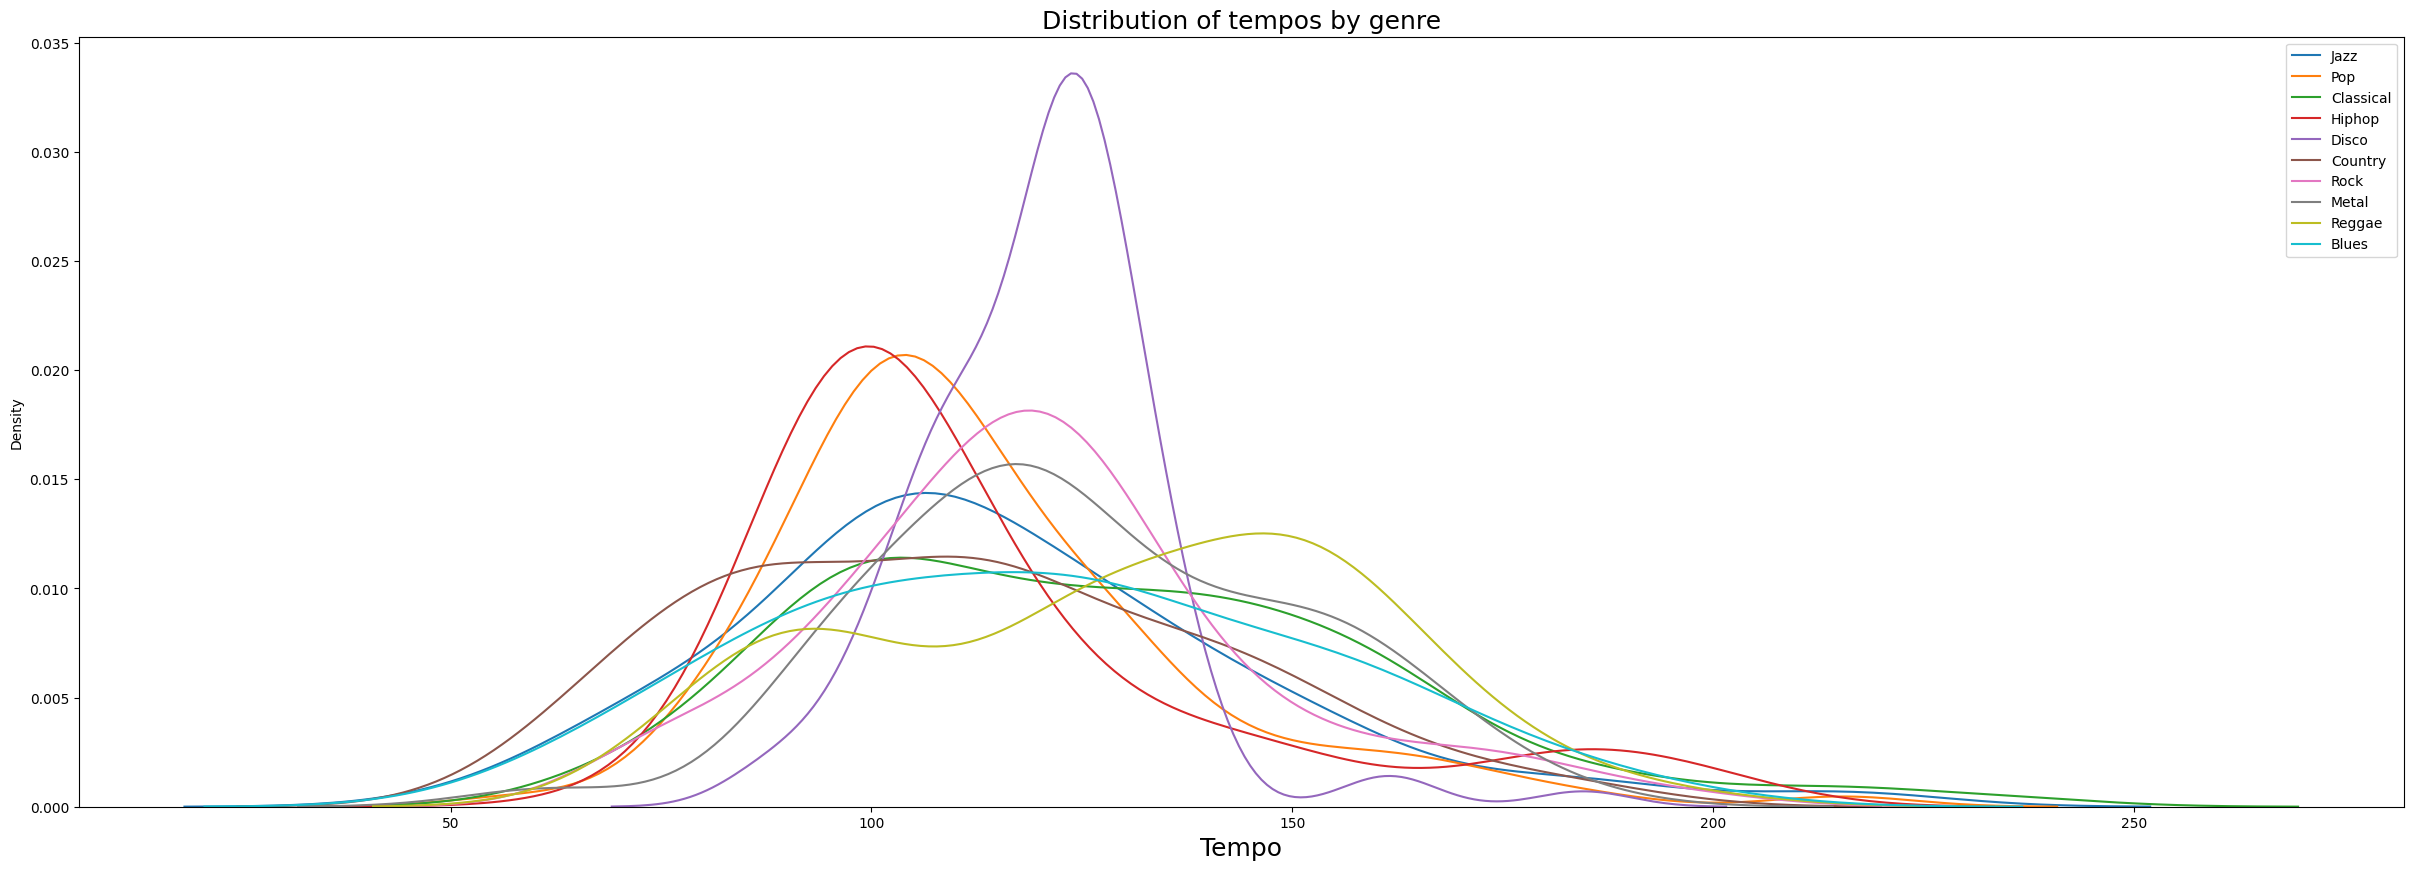

In [58]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'tempo'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'tempo'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'tempo'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'tempo'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'tempo'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'tempo'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'tempo'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'tempo'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'tempo'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'tempo'], label="Blues")

plt.title("Distribution of tempos by genre", fontsize = 18)

plt.xlabel("Tempo", fontsize = 18)

plt.legend()

Text(0, 0.5, 'Mean Tempo')

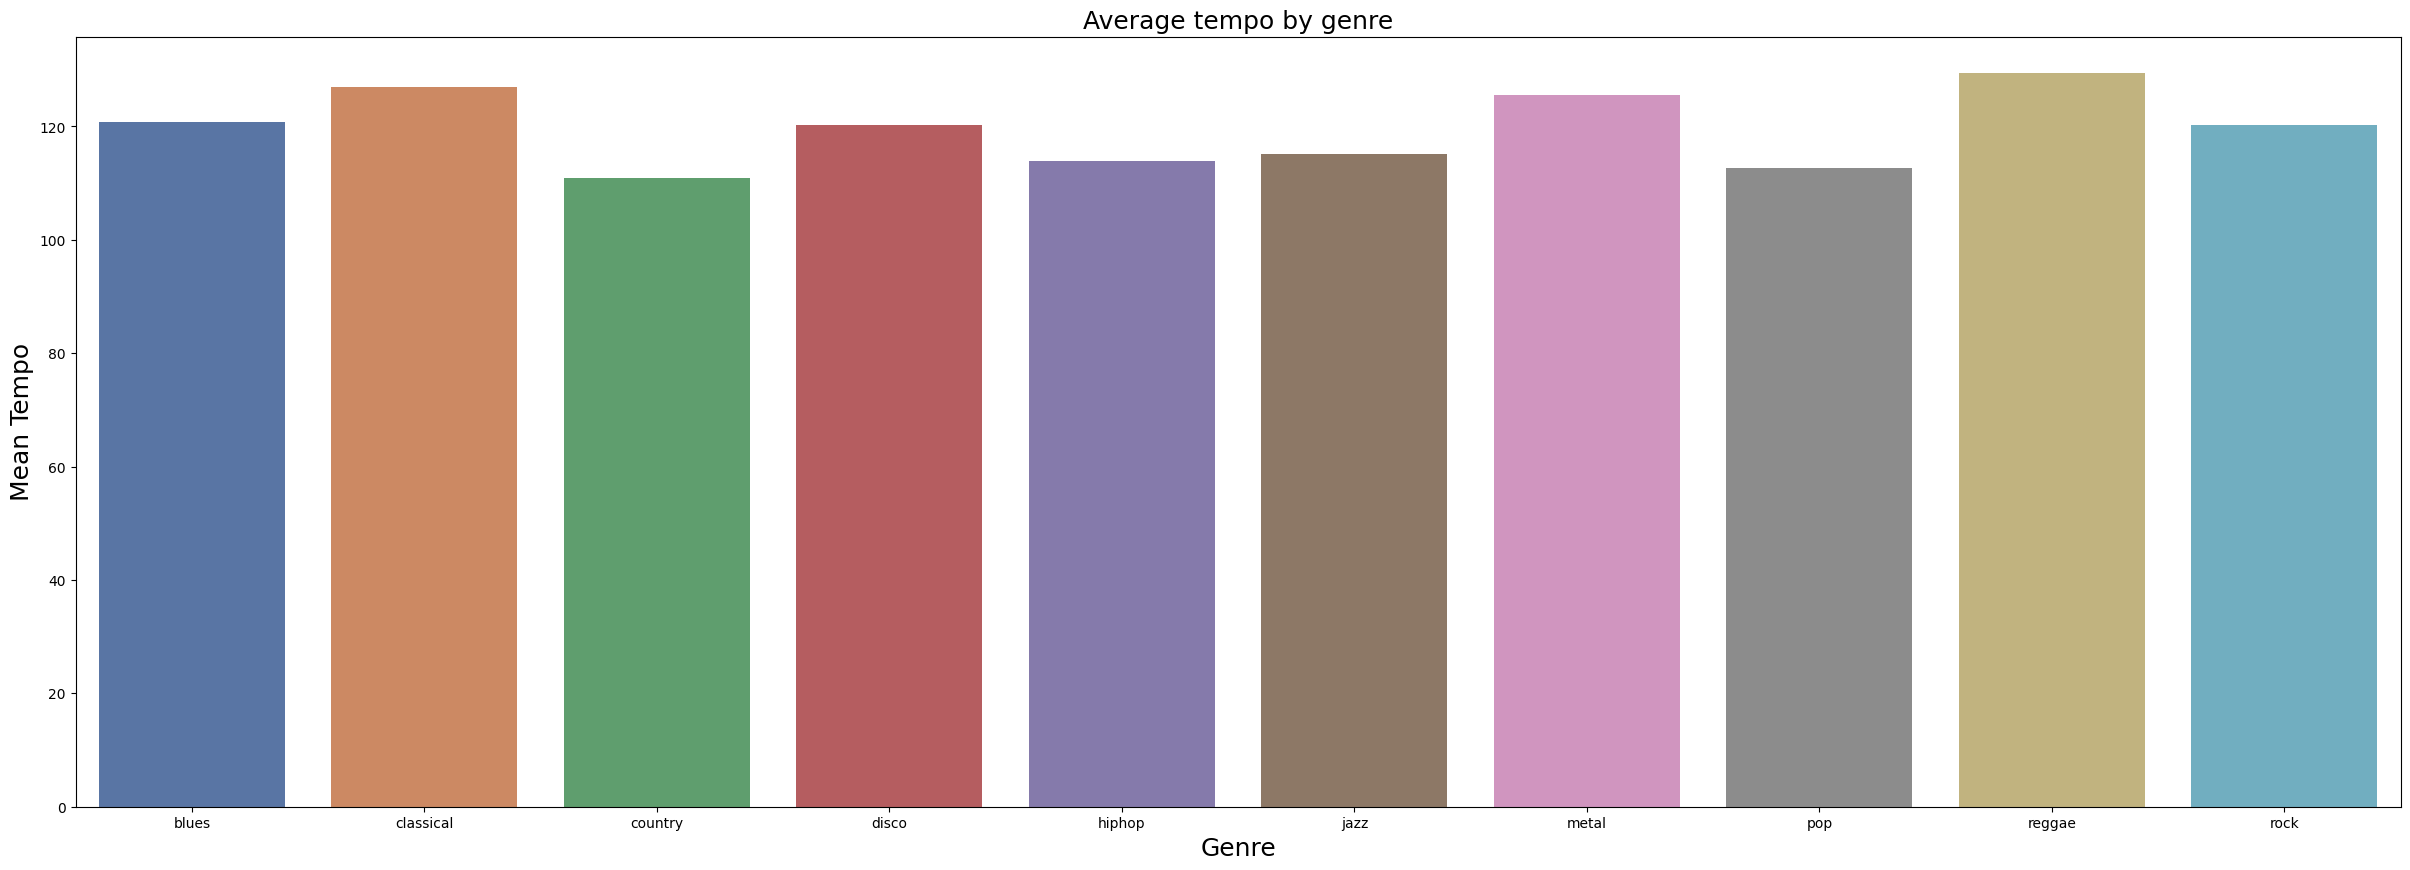

In [59]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

tempos = [ data[data['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos, palette="deep")

plt.title("Average tempo by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Tempo', fontsize = 18)

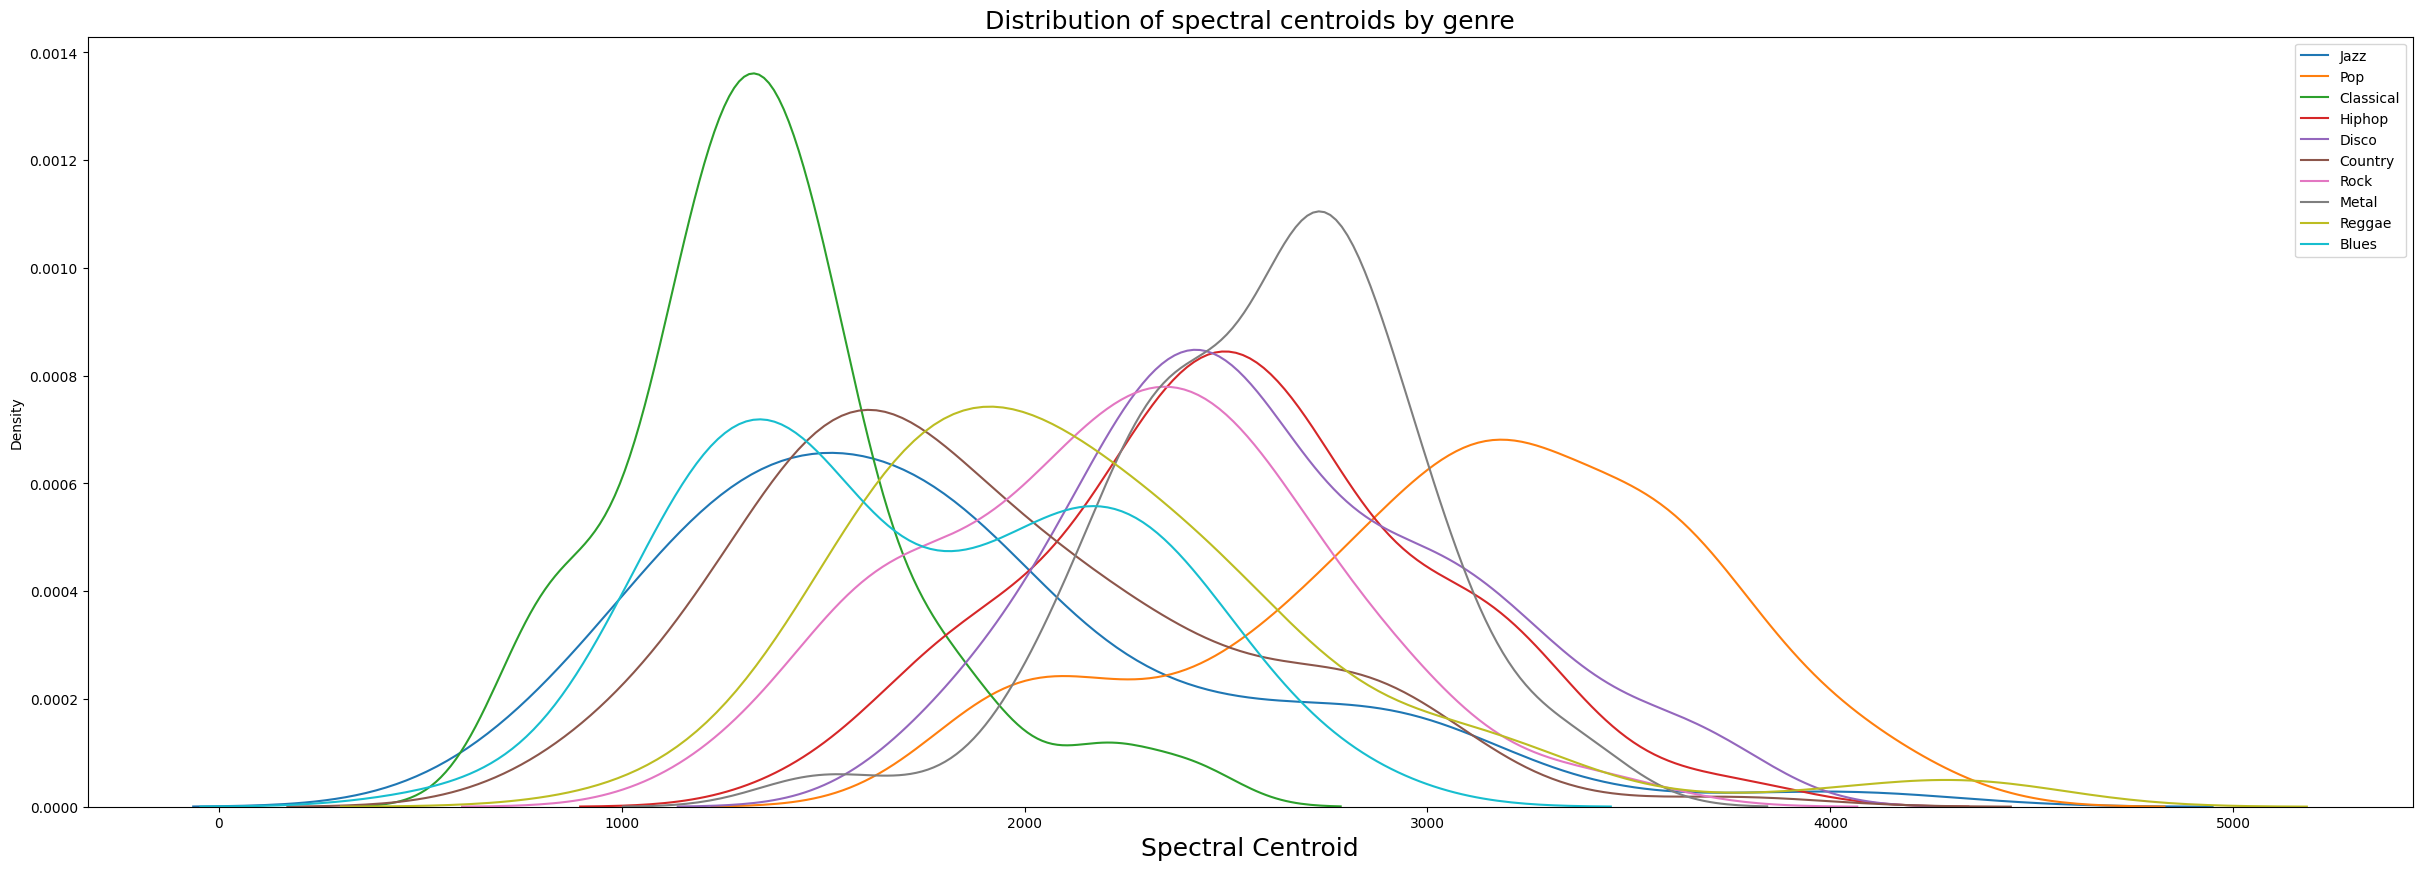

In [60]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'spectral_centroid'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'spectral_centroid'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'spectral_centroid'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'spectral_centroid'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'spectral_centroid'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'spectral_centroid'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'spectral_centroid'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'spectral_centroid'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'spectral_centroid'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'spectral_centroid'], label="Blues")

plt.title("Distribution of spectral centroids by genre", fontsize = 18)

plt.xlabel("Spectral Centroid", fontsize = 18)

plt.legend()

Text(0, 0.5, 'Mean Spectral Centroid')

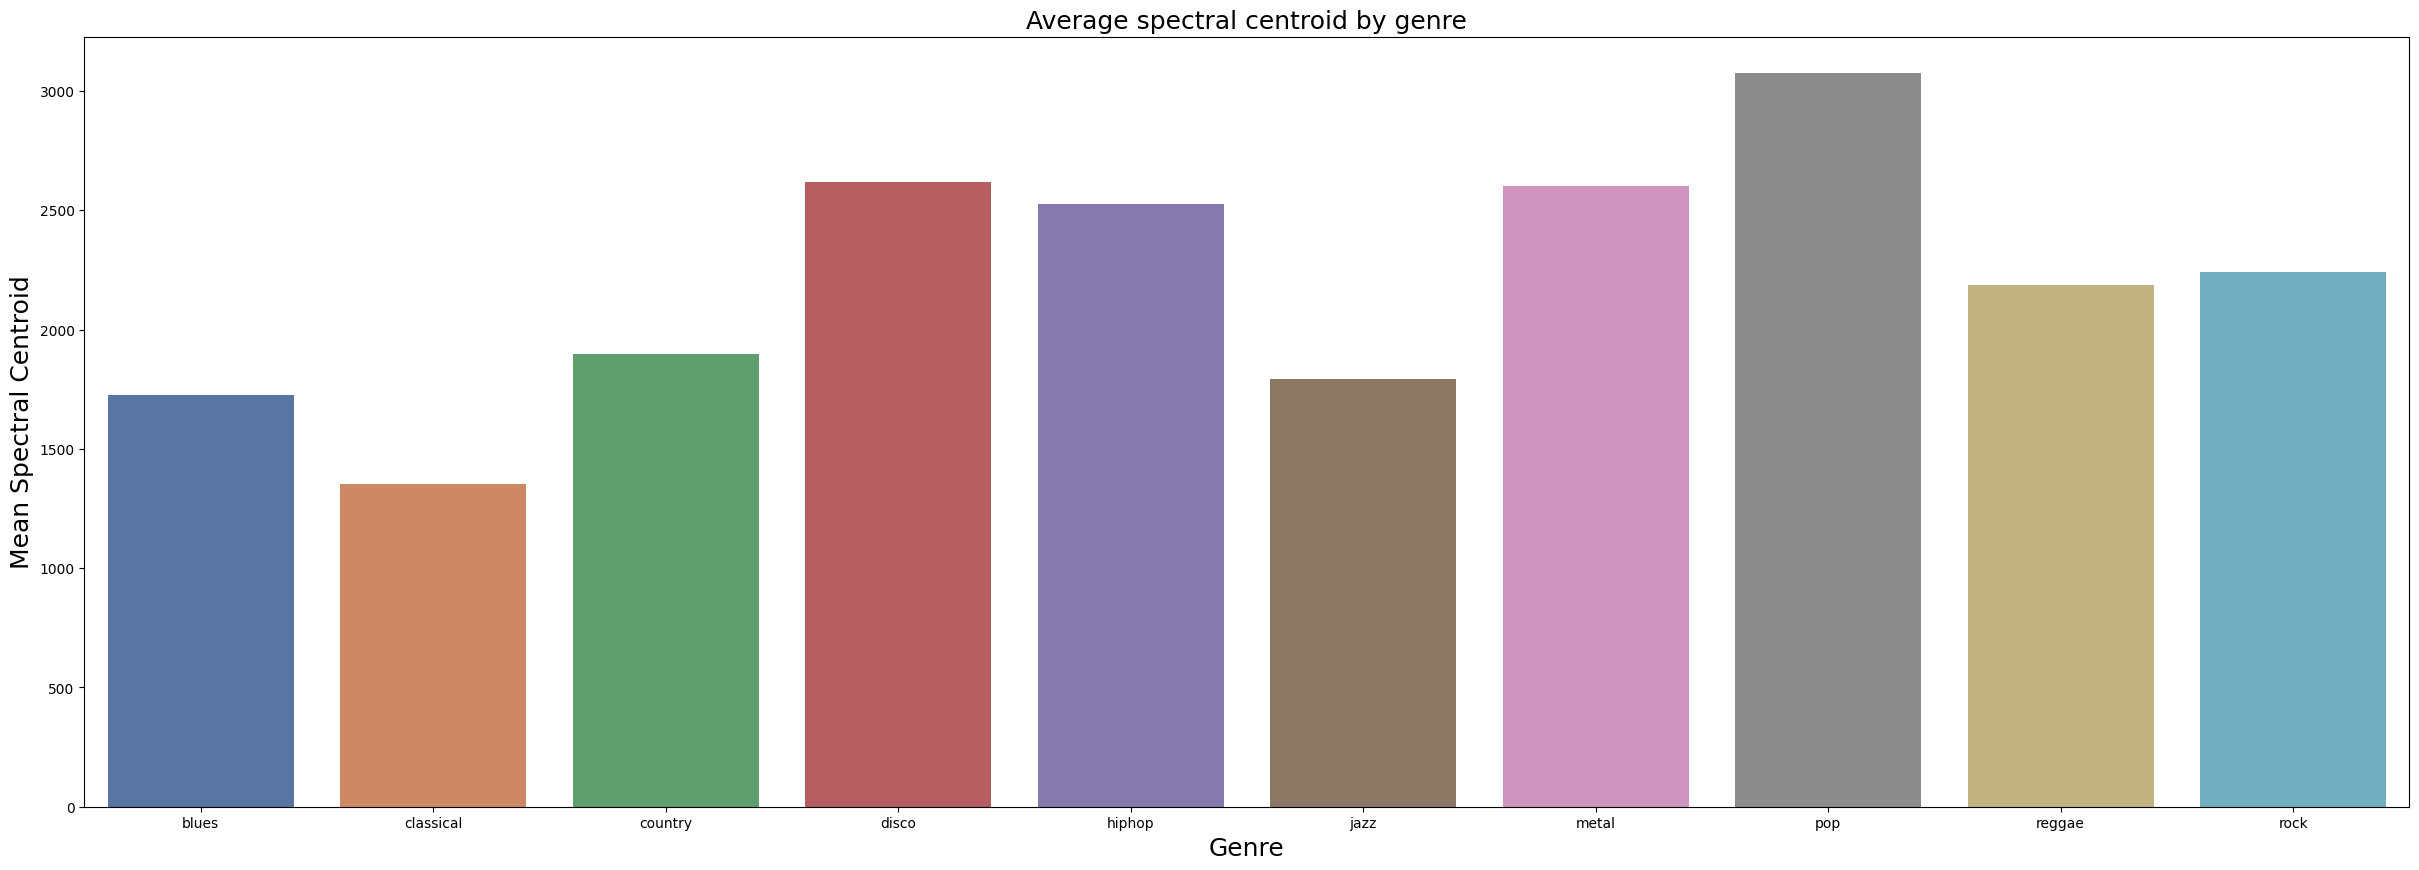

In [61]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

spectral_centroids = [ data[data['label']==x].spectral_centroid.mean() for x in genres ]

sns.barplot(x=genres, y=spectral_centroids, palette="deep")

plt.title("Average spectral centroid by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Spectral Centroid', fontsize = 18)

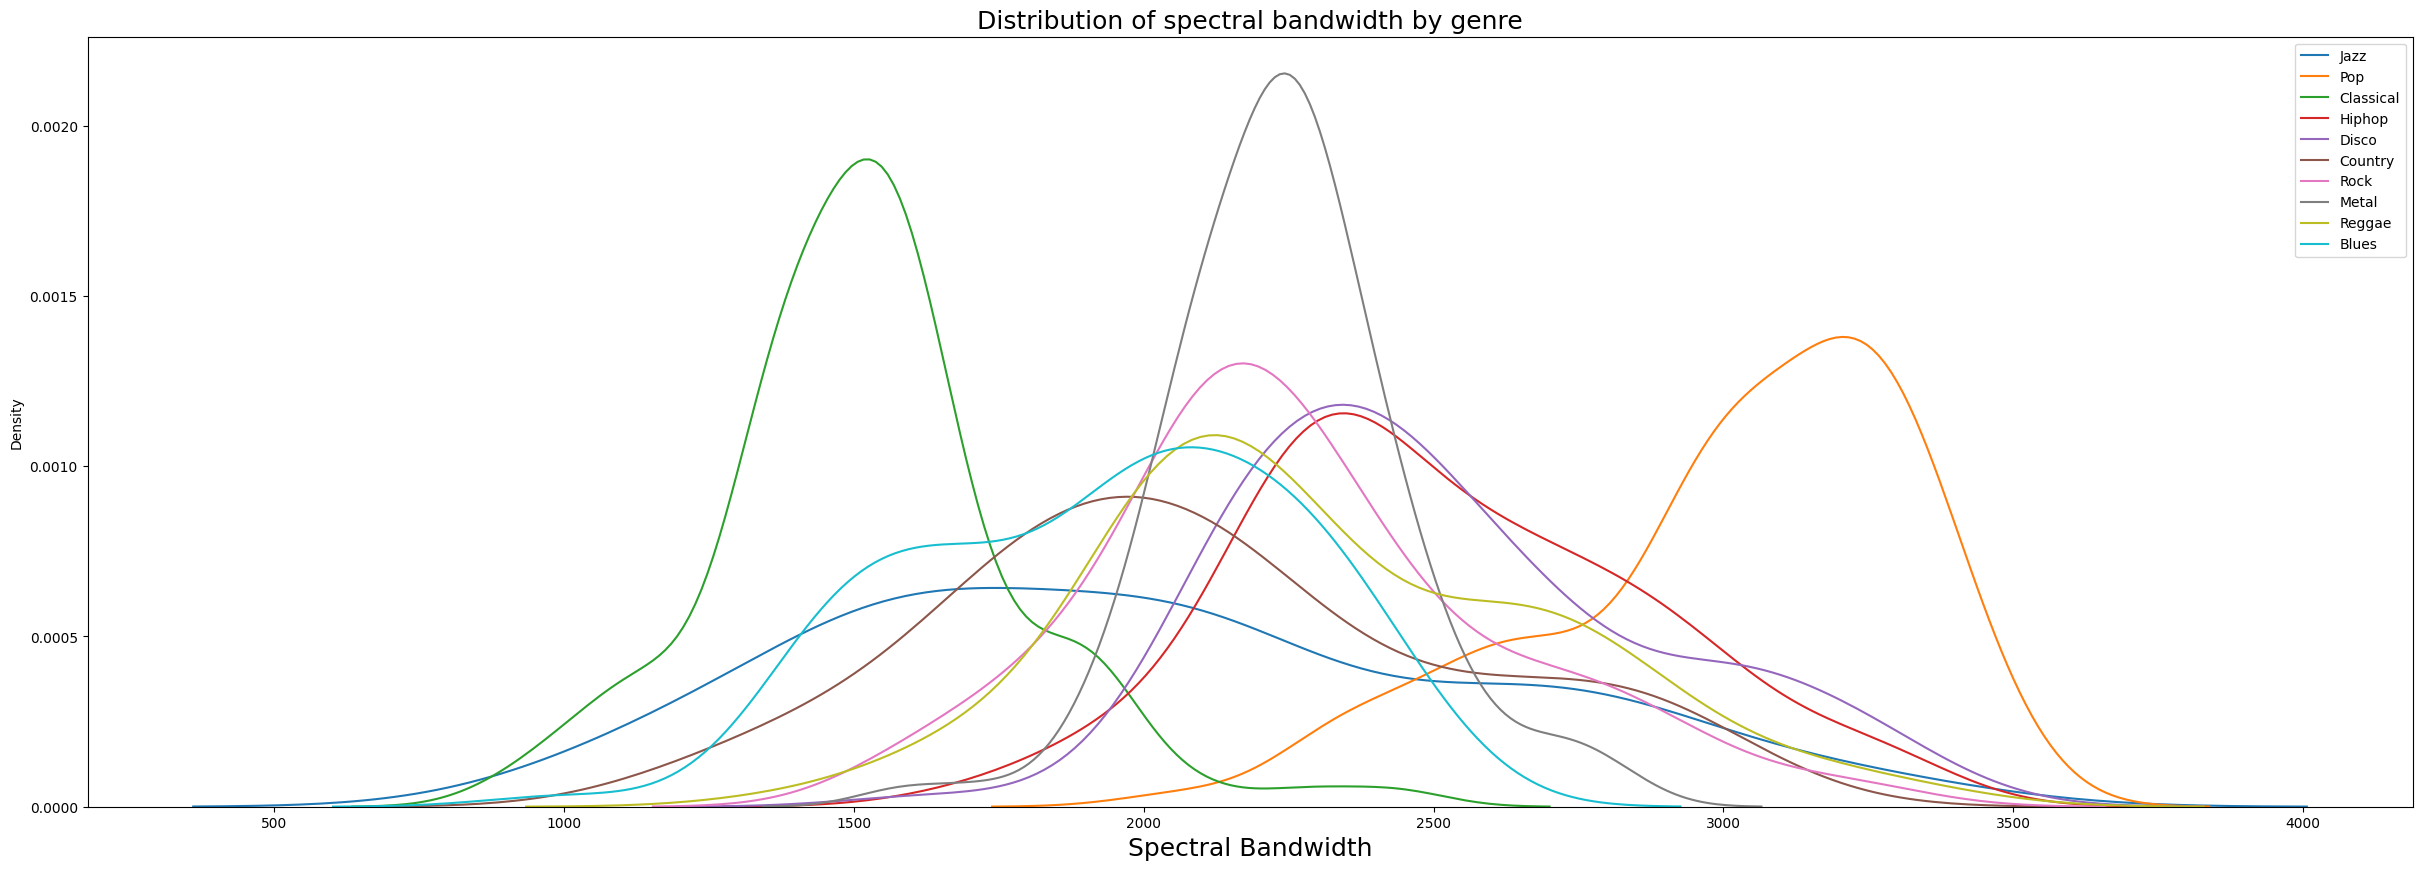

In [62]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'spectral_bandwidth'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'spectral_bandwidth'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'spectral_bandwidth'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'spectral_bandwidth'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'spectral_bandwidth'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'spectral_bandwidth'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'spectral_bandwidth'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'spectral_bandwidth'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'spectral_bandwidth'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'spectral_bandwidth'], label="Blues")

plt.title("Distribution of spectral bandwidth by genre", fontsize = 18)

plt.xlabel("Spectral Bandwidth", fontsize = 18)

plt.legend()

Text(0, 0.5, 'Mean Spectral Bandwidth')

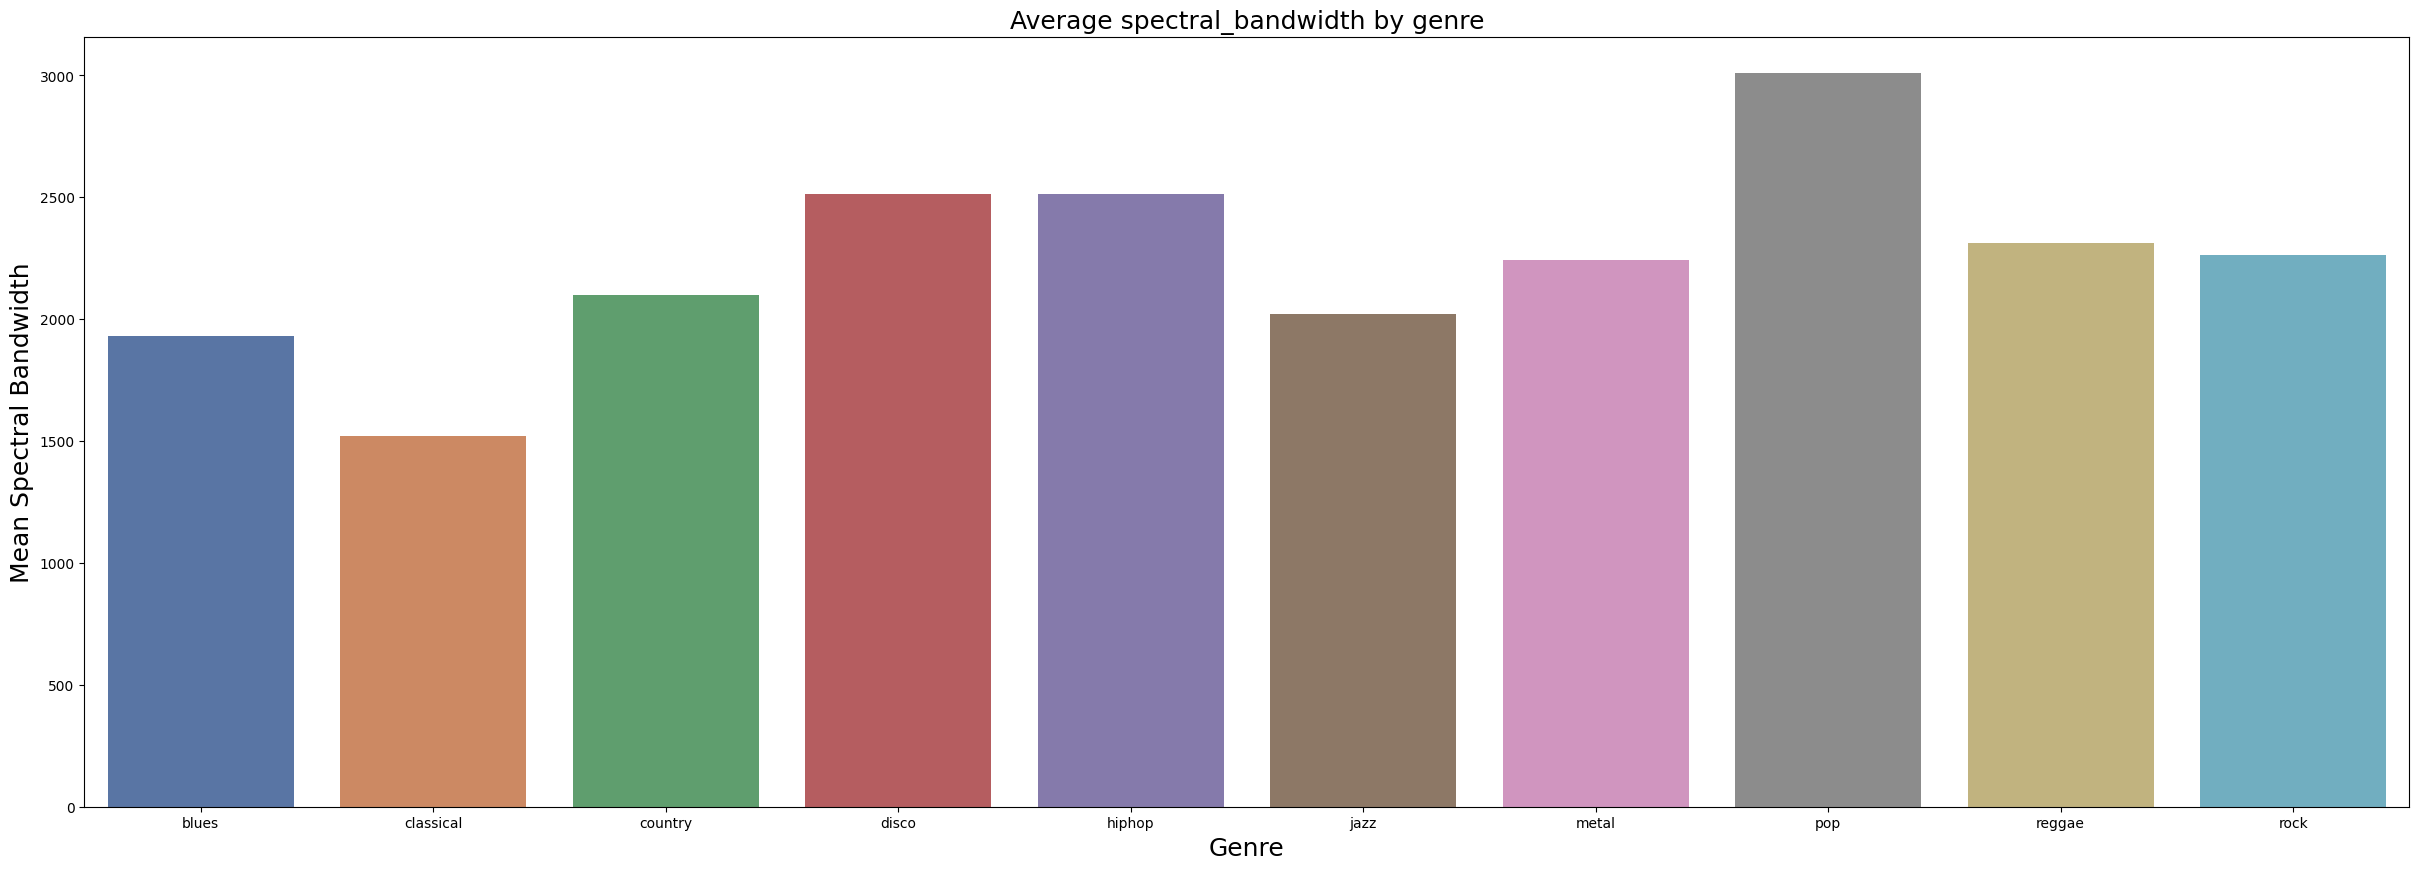

In [63]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

spectral_bandwidths = [ data[data['label']==x].spectral_bandwidth.mean() for x in genres ]

sns.barplot(x=genres, y=spectral_bandwidths, palette="deep")

plt.title("Average spectral_bandwidth by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Spectral Bandwidth', fontsize = 18)

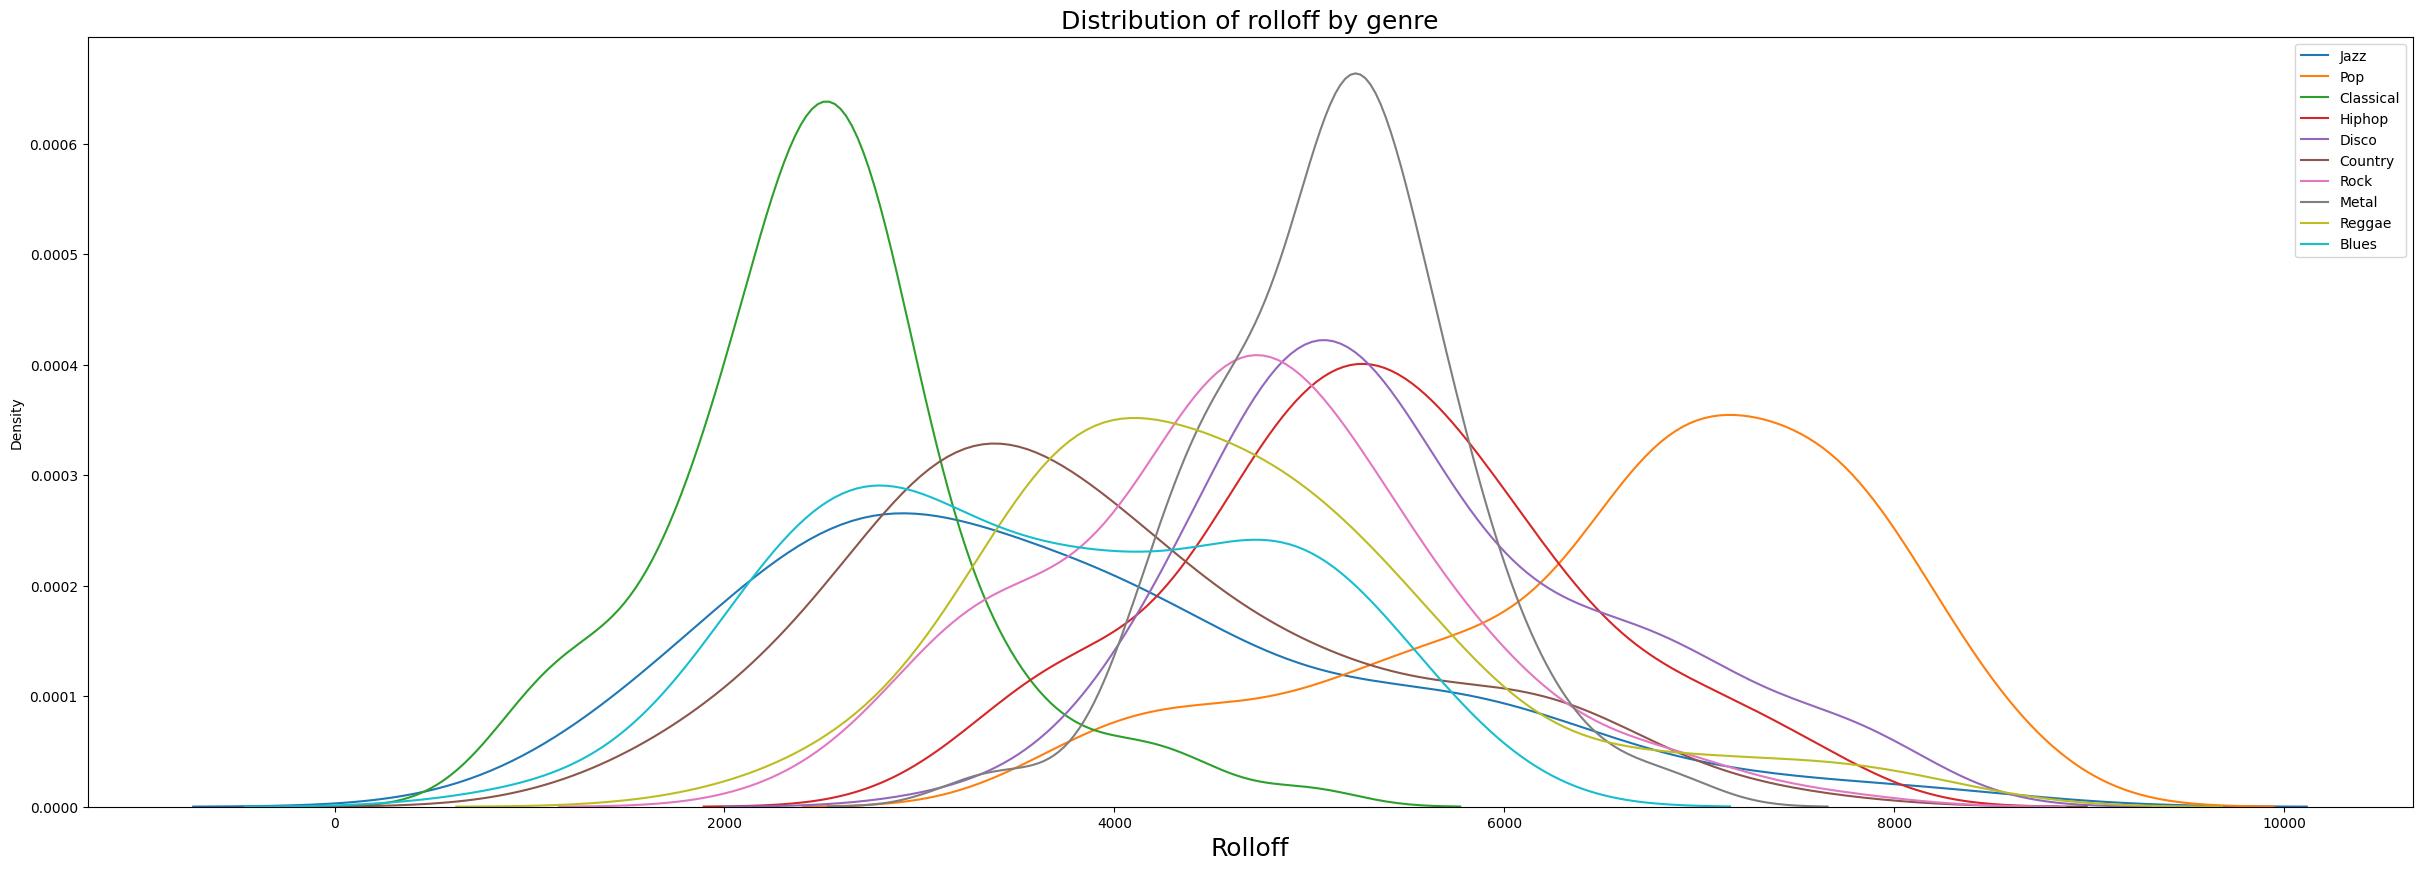

In [64]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'rolloff'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'rolloff'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'rolloff'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'rolloff'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'rolloff'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'rolloff'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'rolloff'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'rolloff'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'rolloff'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'rolloff'], label="Blues")

plt.title("Distribution of rolloff by genre", fontsize = 18)

plt.xlabel("Rolloff", fontsize = 18)

plt.legend()

Text(0, 0.5, 'Rolloff')

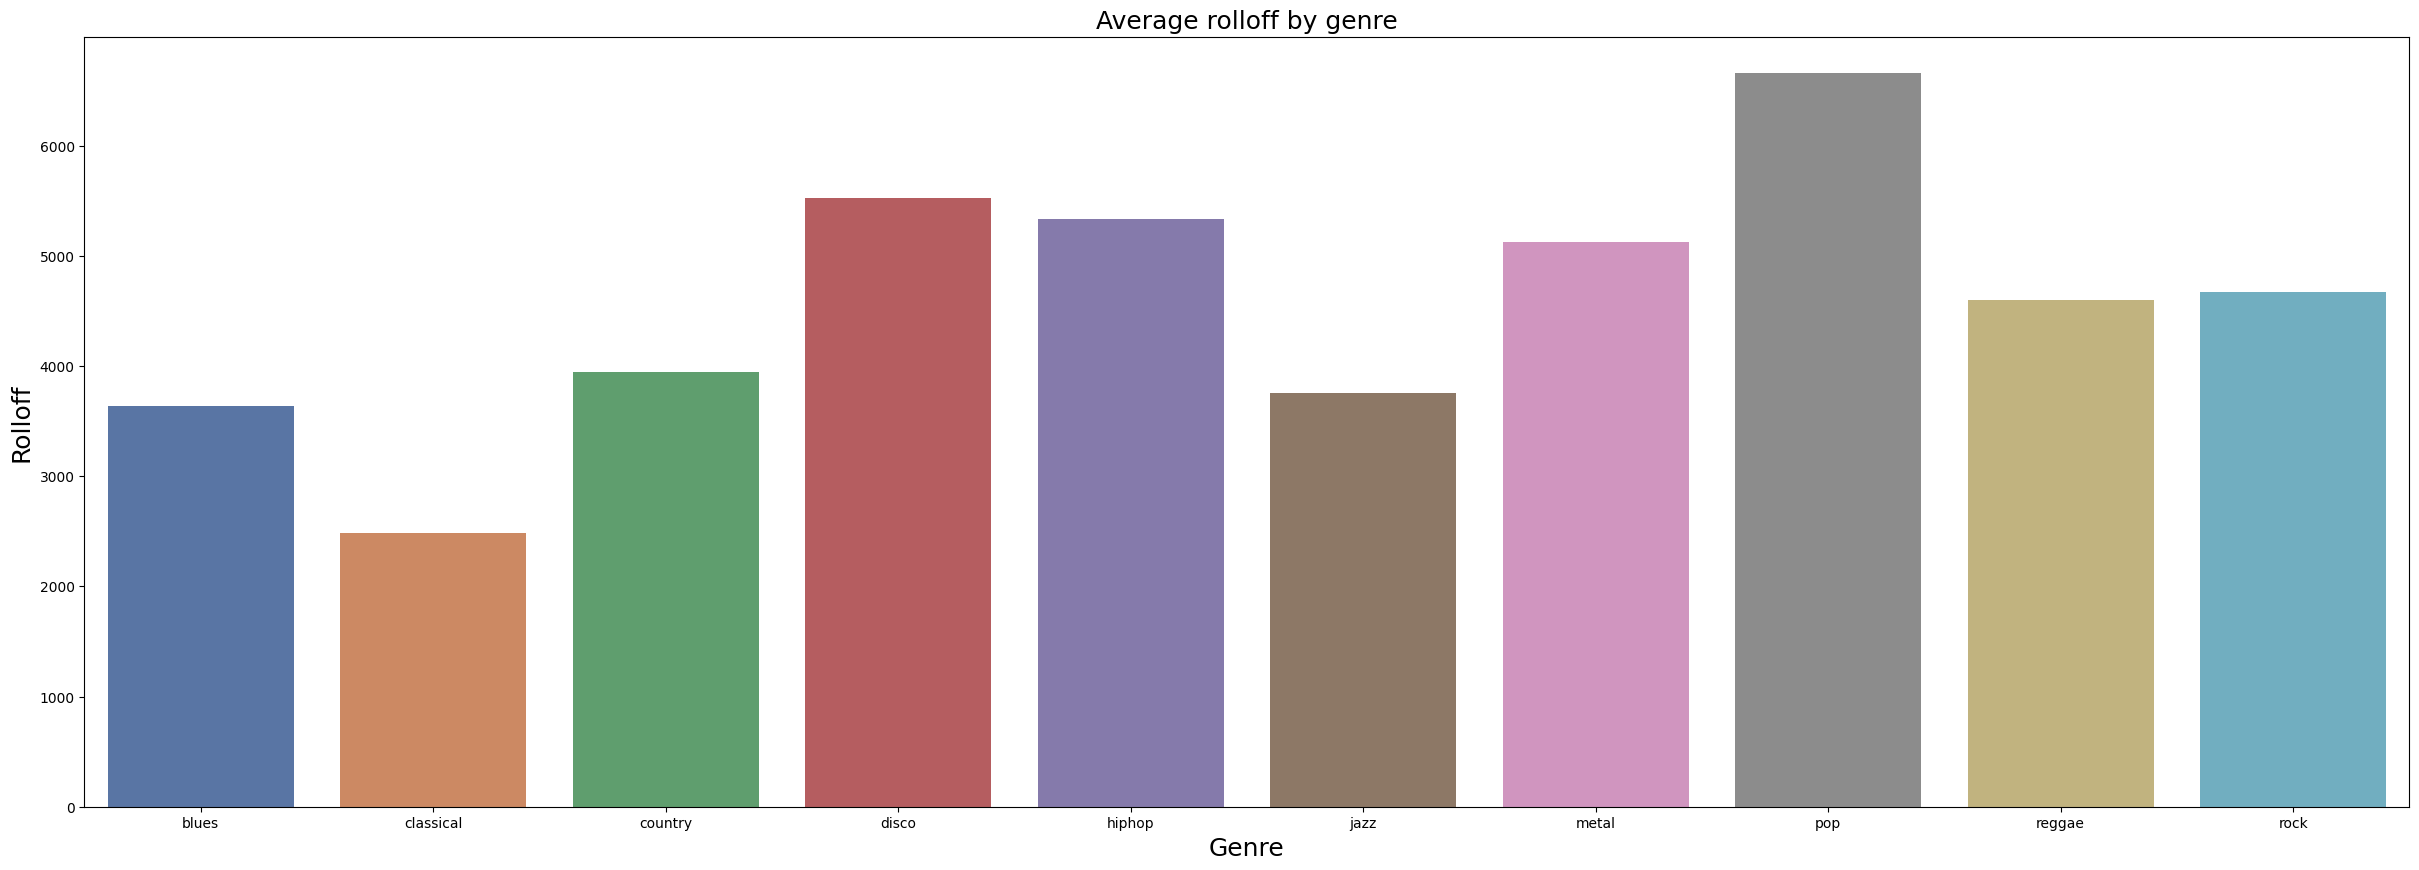

In [65]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

rolloffs = [ data[data['label']==x].rolloff.mean() for x in genres ]

sns.barplot(x=genres, y=rolloffs, palette="deep")

plt.title("Average rolloff by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Rolloff', fontsize = 18)

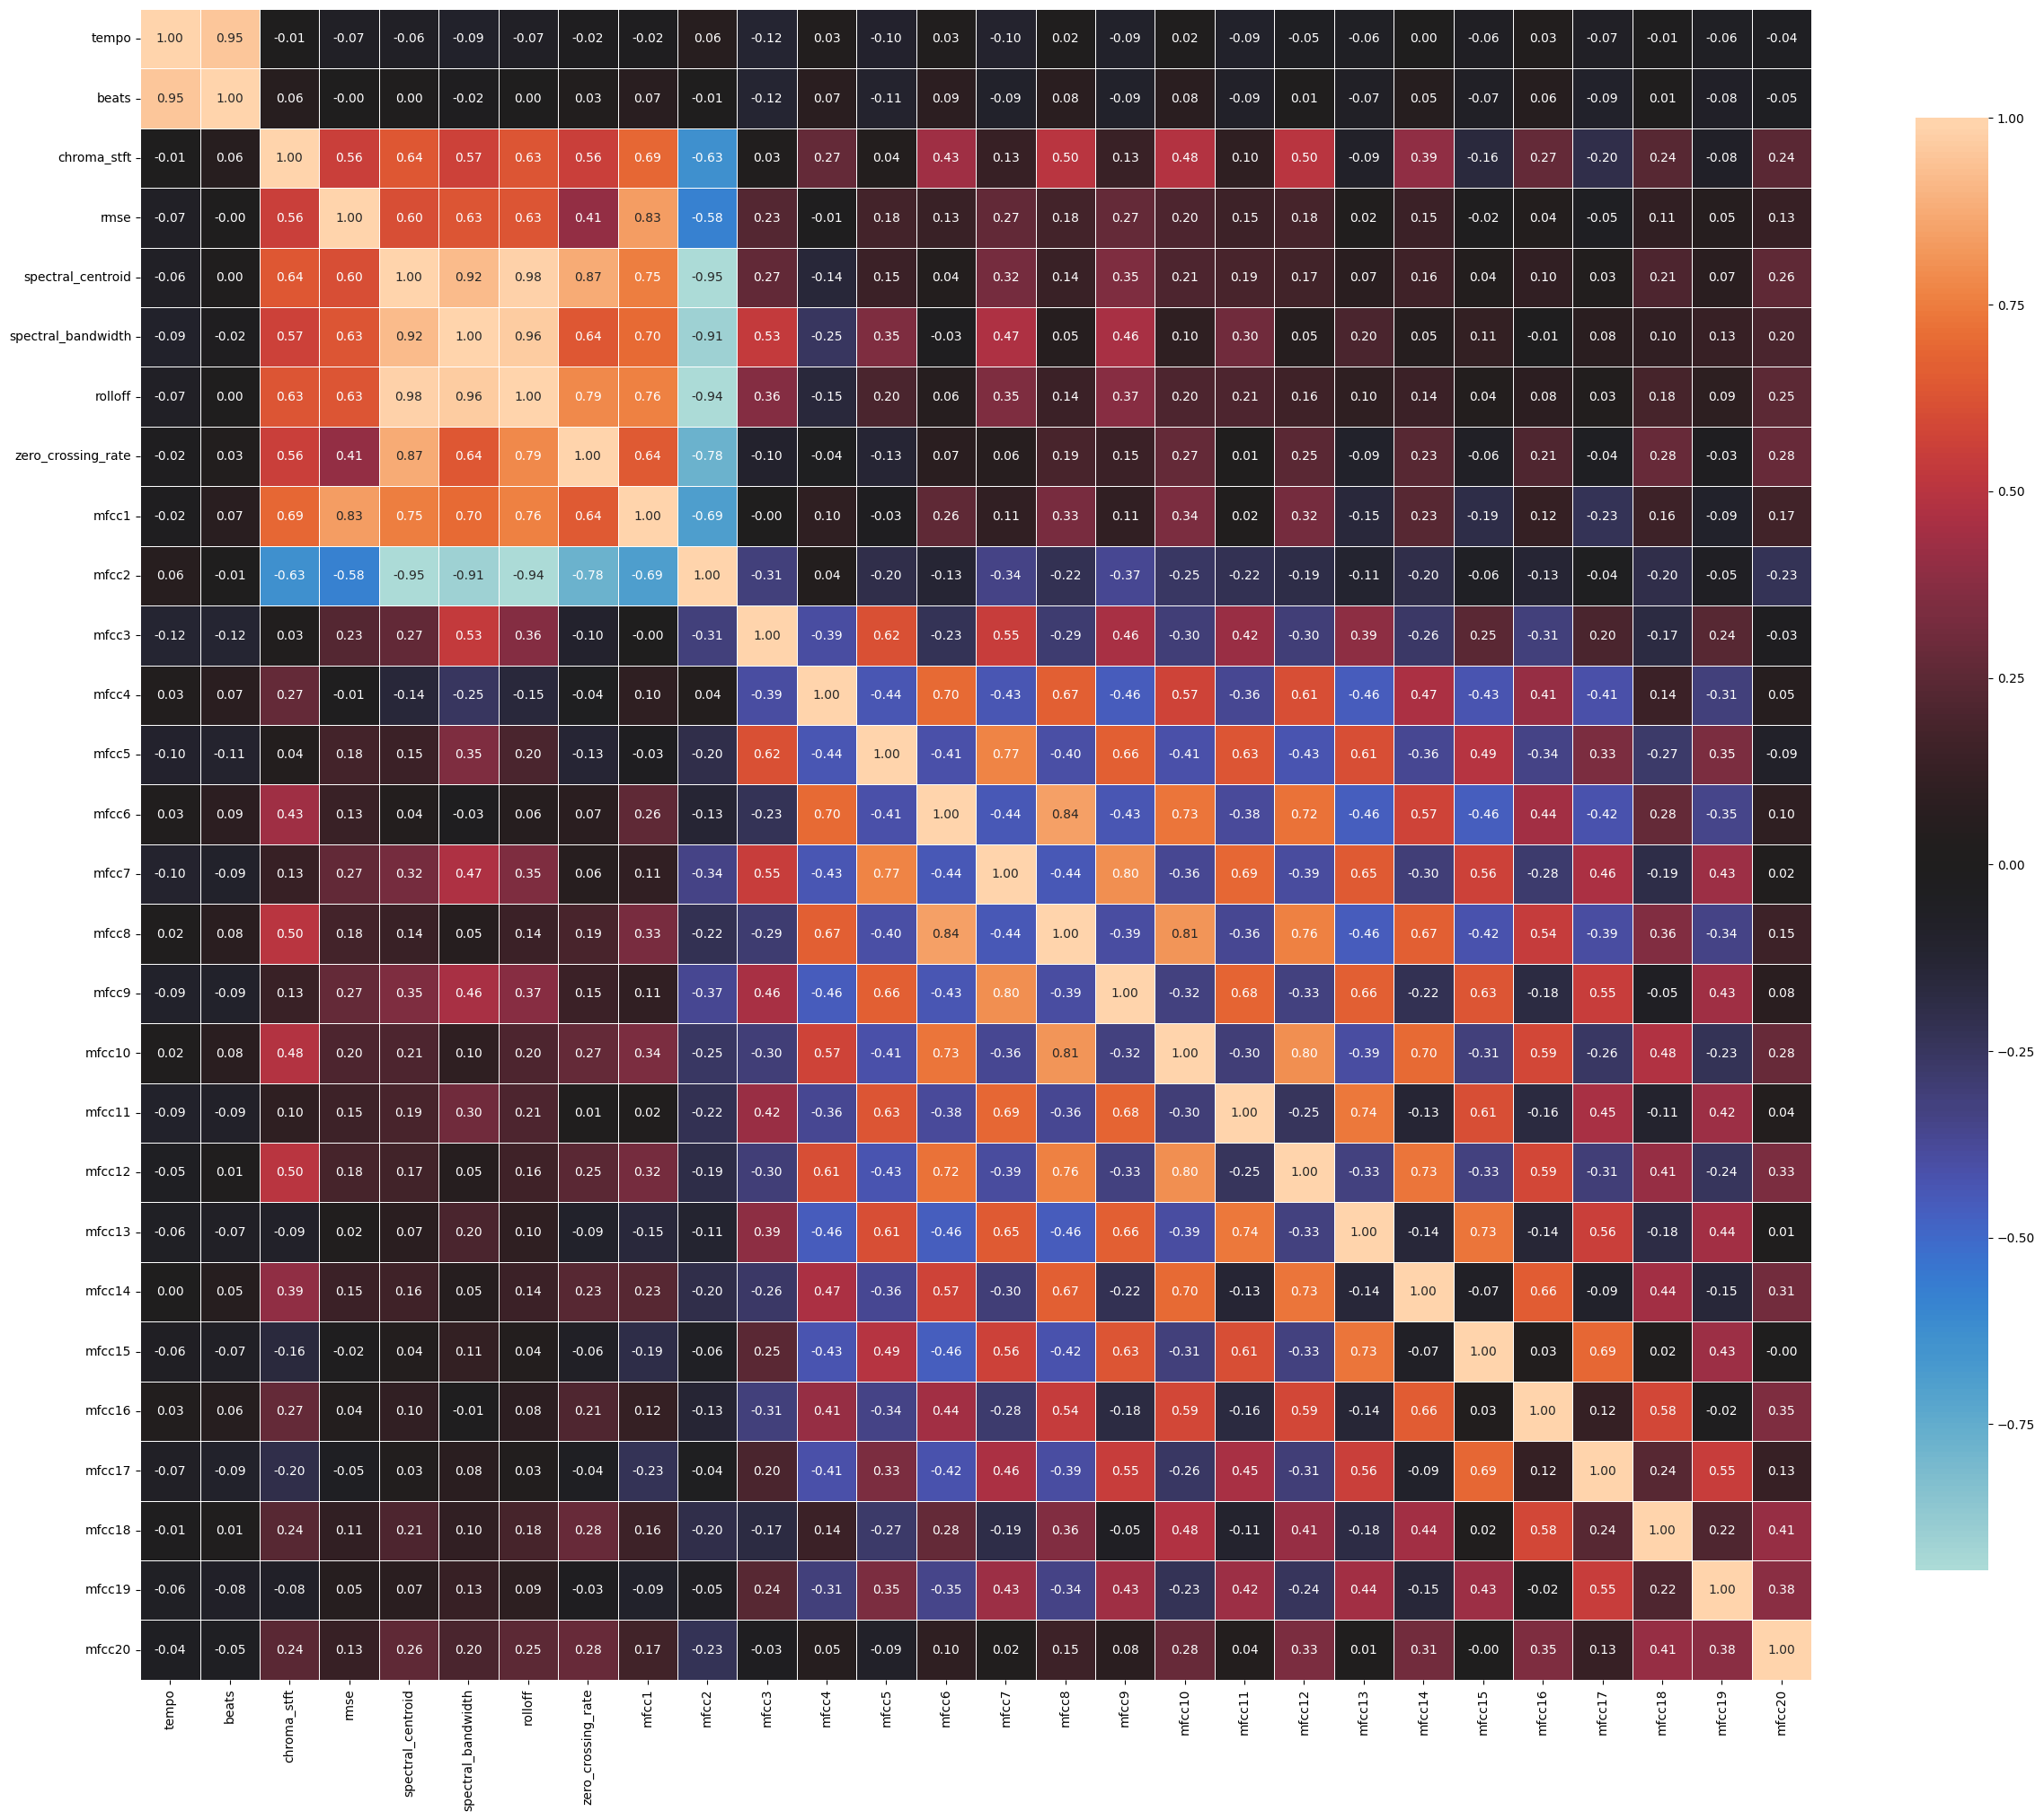

In [66]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

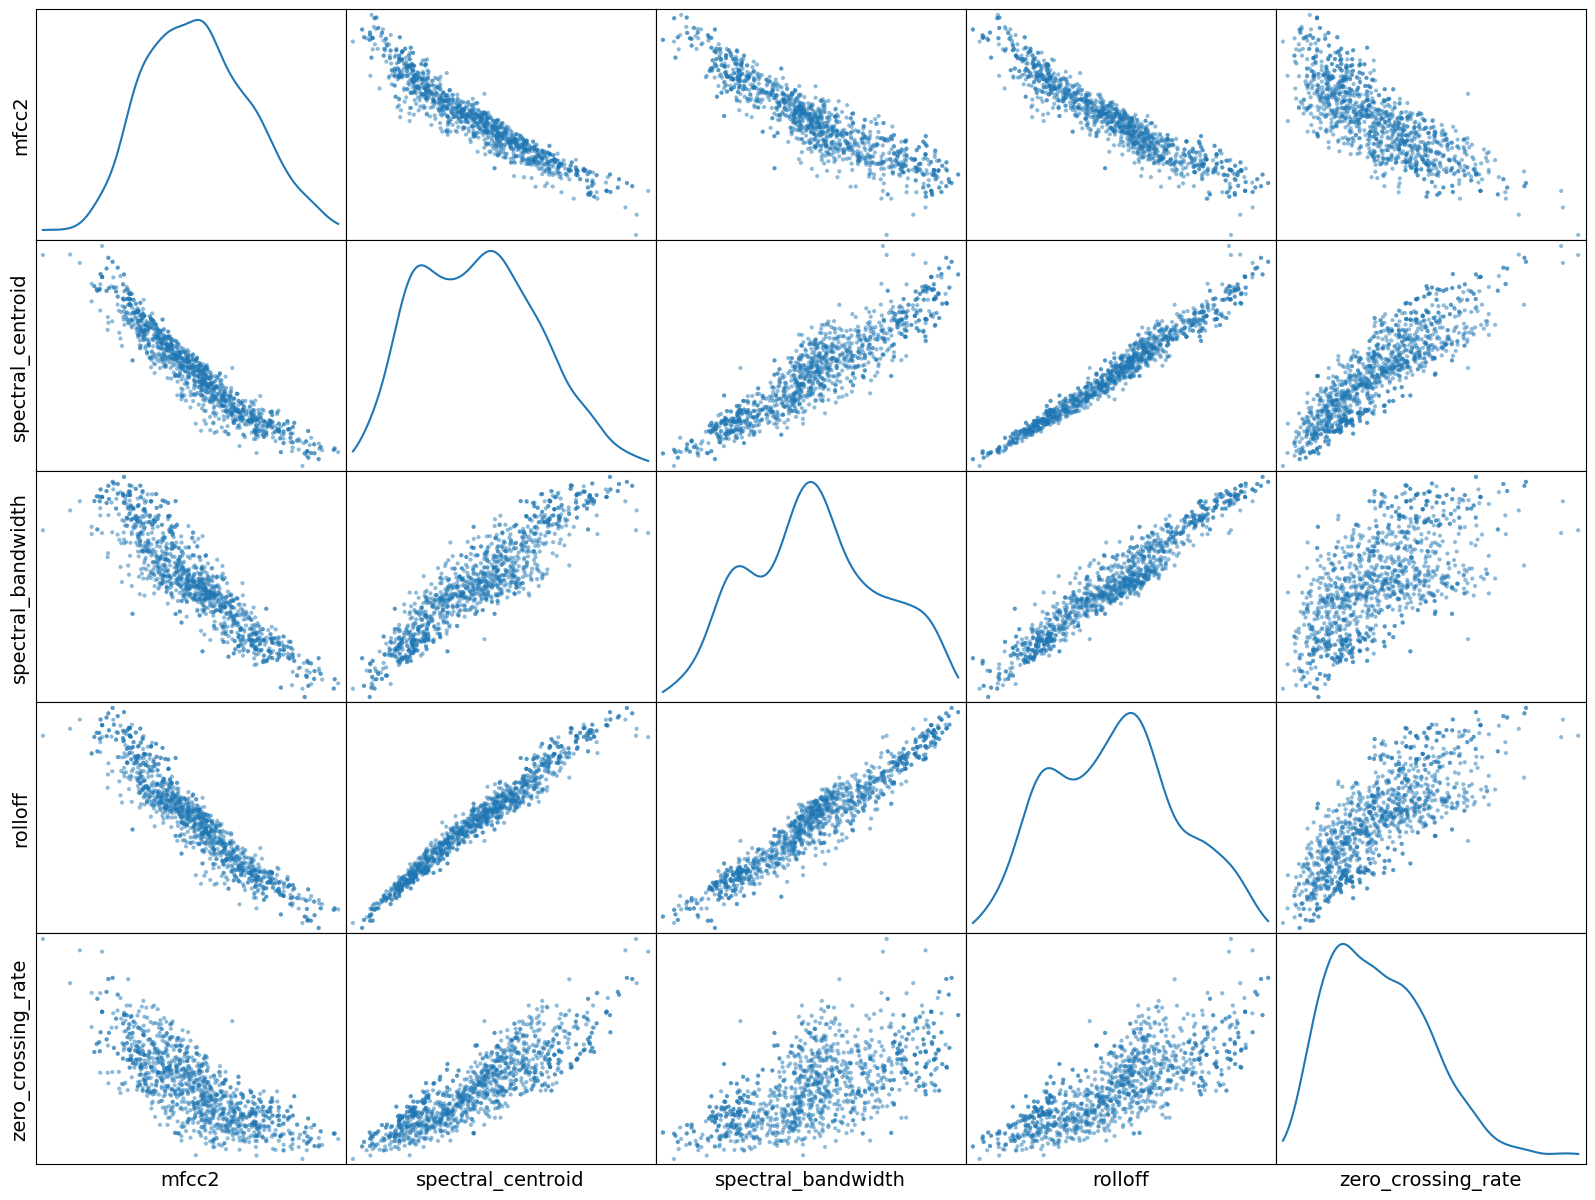

In [67]:
from pandas.plotting import scatter_matrix
attributes = ["mfcc2", "spectral_centroid",
              "spectral_bandwidth", "rolloff", "zero_crossing_rate" ]
sm = scatter_matrix(data[attributes], figsize=(20, 15), diagonal = "kde");

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

for x in sm.ravel():
    x.set_xlabel(x.get_xlabel(), fontsize = 14)
    x.set_ylabel(x.get_ylabel(), fontsize = 14)

In [68]:
data = data.drop('filename', axis=1)

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])

In [70]:
X = data.drop("label",axis=1)
X.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315


In [71]:
y = data["label"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [74]:
X_train_tf = scaler.transform(X_train)
X_train_tf

array([[-1.0821553 , -0.88948453,  1.23528315, ...,  0.24571328,
         0.67395753, -0.26525825],
       [ 0.84119778,  0.97614413, -0.50890347, ...,  0.16051946,
        -0.42396684, -1.55305667],
       [-0.96975155, -0.75128982,  0.24416387, ..., -2.83866102,
        -0.99943574, -1.70649486],
       ...,
       [-1.0821553 , -0.95858189, -0.15444399, ...,  1.15962349,
         0.19573227,  0.92109964],
       [-0.57858649, -0.33670567,  1.06899293, ..., -0.16265985,
         0.35443323,  0.22473664],
       [ 2.28995724,  2.56538337,  0.22376566, ..., -0.47209691,
        -0.3131436 , -1.72465877]])

In [75]:
X_test_tf = scaler.transform(X_test)
X_test_tf

array([[ 0.33413197,  0.49246263, -0.17206537, ...,  1.87363216,
        -0.70056433,  0.38388705],
       [ 1.47503004,  1.528923  , -1.49008497, ...,  0.27118877,
         1.51578839,  1.06062751],
       [ 0.33413197,  0.00878112, -0.29325755, ...,  1.24920345,
        -0.25526257, -1.2461469 ],
       ...,
       [-0.2611192 , -0.06031624, -0.56481406, ..., -1.16821138,
         0.00871738, -1.30324752],
       [-0.57858649, -0.47490038, -1.76677401, ..., -1.1418048 ,
        -1.90864735, -1.60908343],
       [ 0.57432104,  0.76885206, -0.07707696, ..., -0.28582867,
        -0.57685976, -0.82457314]])

### XGBoost Classifier

In [76]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_tf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [77]:
classifier.score(X_train_tf,y_train)

0.9989583333333333

In [78]:
y_pred_xgb = classifier.predict(X_test_tf)
accuracy_score(y_test, y_pred_xgb)

0.725

In [81]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[ 8  0  1  1  0  2  2  0  0  0]
 [ 0 38  0  0  0  0  0  0  4  0]
 [ 2  1 16  1  0  1  0  1  0  3]
 [ 1  0  0  9  1  0  0  2  1  2]
 [ 1  0  1  3 13  0  2  3  1  0]
 [ 2  3  2  0  0 18  0  0  0  1]
 [ 0  0  0  1  1  1 14  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 1  1  1  1  2  0  0  1 12  0]
 [ 3  0  2  1  2  1  0  1  1  6]]


In [82]:
print("XGBoost Classifier report: \n\n", classification_report(y_test, y_pred_xgb))

XGBoost Classifier report: 

               precision    recall  f1-score   support

           0       0.44      0.57      0.50        14
           1       0.88      0.90      0.89        42
           2       0.70      0.64      0.67        25
           3       0.53      0.56      0.55        16
           4       0.68      0.54      0.60        24
           5       0.78      0.69      0.73        26
           6       0.78      0.82      0.80        17
           7       0.83      1.00      0.91        40
           8       0.63      0.63      0.63        19
           9       0.50      0.35      0.41        17

    accuracy                           0.73       240
   macro avg       0.68      0.67      0.67       240
weighted avg       0.72      0.72      0.72       240



## Random Forest Classifier

In [83]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train_tf, y_train)

RandomForestClassifier()

In [84]:
classifier_rf.score(X_train_tf,y_train)

0.9989583333333333

In [85]:
y_pred_rf = classifier_rf.predict(X_test_tf)
accuracy_score(y_test, y_pred_rf)

0.7166666666666667

In [86]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[12  0  1  0  0  0  1  0  0  0]
 [ 0 40  0  0  0  0  0  2  0  0]
 [ 3  3 11  2  0  3  0  2  0  1]
 [ 0  0  0  9  1  0  0  4  0  2]
 [ 1  0  1  3 12  0  3  3  1  0]
 [ 1  3  2  1  0 18  0  0  1  0]
 [ 1  0  0  1  1  0 14  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  2  0  2  0  0  4  9  0]
 [ 2  0  2  2  3  0  0  1  0  7]]


In [87]:
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.60      0.86      0.71        14
           1       0.83      0.95      0.89        42
           2       0.58      0.44      0.50        25
           3       0.50      0.56      0.53        16
           4       0.63      0.50      0.56        24
           5       0.86      0.69      0.77        26
           6       0.78      0.82      0.80        17
           7       0.71      1.00      0.83        40
           8       0.82      0.47      0.60        19
           9       0.70      0.41      0.52        17

    accuracy                           0.72       240
   macro avg       0.70      0.67      0.67       240
weighted avg       0.72      0.72      0.70       240

